In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv("../data/raw/loan_data.csv", header=1)

# Data Cleaning

In [29]:
df_cleaned = df.copy()

In [30]:
df_cleaned.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [31]:
df_cleaned.shape

(30000, 25)

In [32]:
df_cleaned.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [33]:
df_cleaned.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

# Preprocessing

<Axes: xlabel='MARRIAGE'>

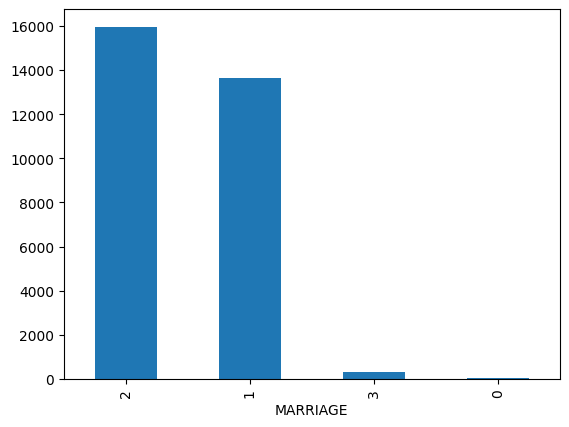

In [34]:
df_cleaned['MARRIAGE'].value_counts().plot(kind='bar')

In [35]:
df_cleaned['MARRIAGE'] = df_cleaned['MARRIAGE'].replace({0:3})
df_cleaned['MARRIAGE'] = df_cleaned['MARRIAGE'].map({1:'Married', 2:'Single', 3:'Others'})

<Axes: xlabel='MARRIAGE'>

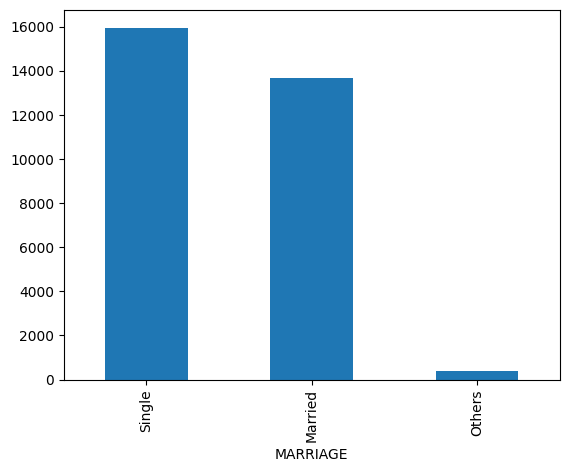

In [36]:
df_cleaned['MARRIAGE'].value_counts().plot(kind='bar')

In [37]:
df_cleaned['EDUCATION'] = df_cleaned['EDUCATION'].replace({4:'Others',5:'Others',6:'Others',0:'Others'})
df_cleaned['EDUCATION'] = df_cleaned['EDUCATION'].map({1:'Graduate', 2:'University', 3:'HighSchool', 'Others':'Others'})

<Axes: xlabel='EDUCATION'>

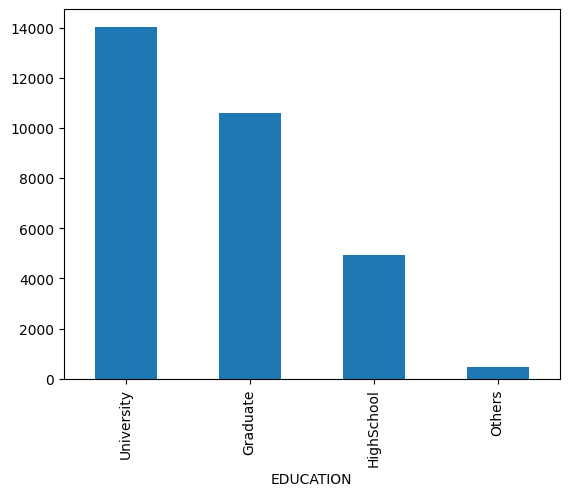

In [38]:
df_cleaned['EDUCATION'].value_counts().plot(kind='bar')

<Axes: xlabel='SEX'>

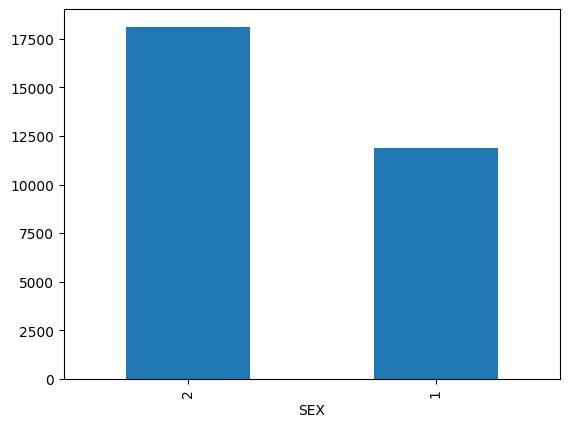

In [39]:
df_cleaned['SEX'].value_counts().plot(kind='bar')

In [40]:
df_cleaned['SEX'] = df_cleaned['SEX'].map({1:'Male', 2:'Female'})

<Axes: xlabel='SEX'>

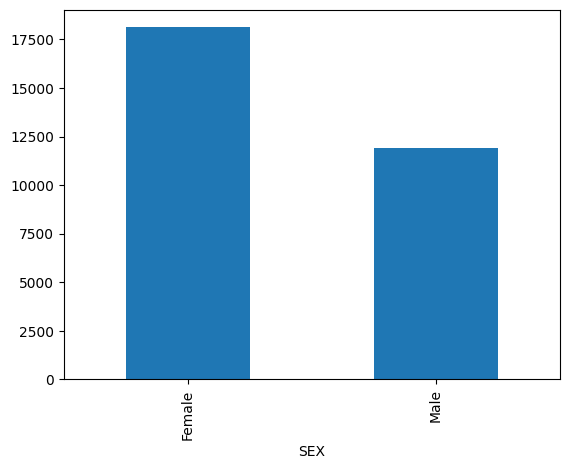

In [41]:
df_cleaned['SEX'].value_counts().plot(kind='bar')

## Encoding for the Model

In [42]:
df_cleaned['SEX'] = df_cleaned['SEX'].map({"Male":0, "Female":1})

In [43]:
df_cleaned.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,1,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,1,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,1,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,1,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,0,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [44]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['EDUCATION'], drop_first=False)

In [45]:
df_cleaned.head()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_Graduate,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University
0,1,20000,1,Married,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,False,False,False,True
1,2,120000,1,Single,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,False,False,False,True
2,3,90000,1,Single,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,False,False,False,True
3,4,50000,1,Married,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,False,False,False,True
4,5,50000,0,Married,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,False,False,False,True


In [46]:
df_cleaned.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_Graduate',
       'EDUCATION_HighSchool', 'EDUCATION_Others', 'EDUCATION_University'],
      dtype='object')

In [47]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['MARRIAGE'], drop_first=False)

In [48]:
df_cleaned.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_Graduate,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,False,False,False,True,True,False,False
1,2,120000,1,26,-1,2,0,0,0,2,...,0,2000,1,False,False,False,True,False,False,True
2,3,90000,1,34,0,0,0,0,0,0,...,1000,5000,0,False,False,False,True,False,False,True
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,0,False,False,False,True,True,False,False
4,5,50000,0,57,-1,0,-1,0,0,0,...,689,679,0,False,False,False,True,True,False,False


In [49]:
df_cleaned = df_cleaned.astype(int)

In [50]:
df_cleaned

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_Graduate,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,1,1,0,0
1,2,120000,1,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,1,0,0,1
2,3,90000,1,34,0,0,0,0,0,0,...,1000,5000,0,0,0,0,1,0,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,0,0,0,0,1,1,0,0
4,5,50000,0,57,-1,0,-1,0,0,0,...,689,679,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,39,0,0,0,0,0,0,...,5000,1000,0,0,1,0,0,1,0,0
29996,29997,150000,0,43,-1,-1,-1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
29997,29998,30000,0,37,4,3,2,-1,0,0,...,2000,3100,1,0,0,0,1,0,0,1
29998,29999,80000,0,41,1,-1,0,0,0,-1,...,52964,1804,1,0,1,0,0,1,0,0


# Feature Engineering and Extraction

In [52]:
 df_cleaned['avg_utilization'] = df_cleaned[['BILL_AMT1','BILL_AMT2','BILL_AMT3',
                                'BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1) / df_cleaned['LIMIT_BAL']

In [53]:
df_cleaned

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT6,default payment next month,EDUCATION_Graduate,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,avg_utilization
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,1,0,0,0,1,1,0,0,0.064200
1,2,120000,1,26,-1,2,0,0,0,2,...,2000,1,0,0,0,1,0,0,1,0.023718
2,3,90000,1,34,0,0,0,0,0,0,...,5000,0,0,0,0,1,0,0,1,0.188246
3,4,50000,1,37,0,0,0,0,0,0,...,1000,0,0,0,0,1,1,0,0,0.771113
4,5,50000,0,57,-1,0,-1,0,0,0,...,679,0,0,0,0,1,1,0,0,0.364463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,39,0,0,0,0,0,0,...,1000,0,0,1,0,0,1,0,0,0.549507
29996,29997,150000,0,43,-1,-1,-1,-1,0,0,...,0,0,0,1,0,0,0,0,1,0.023536
29997,29998,30000,0,37,4,3,2,-1,0,0,...,3100,1,0,0,0,1,0,0,1,0.391644
29998,29999,80000,0,41,1,-1,0,0,0,-1,...,1804,1,0,1,0,0,1,0,0,0.555440


In [55]:
df_cleaned['max_utilization'] = df_cleaned[['BILL_AMT1','BILL_AMT2','BILL_AMT3',
                                'BILL_AMT4','BILL_AMT5','BILL_AMT6']].max(axis=1) / df_cleaned['LIMIT_BAL']

In [56]:
df_cleaned

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,default payment next month,EDUCATION_Graduate,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,avg_utilization,max_utilization
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,1,0,0,0,1,1,0,0,0.064200,0.195650
1,2,120000,1,26,-1,2,0,0,0,2,...,1,0,0,0,1,0,0,1,0.023718,0.028792
2,3,90000,1,34,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.188246,0.324878
3,4,50000,1,37,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0.771113,0.985820
4,5,50000,0,57,-1,0,-1,0,0,0,...,0,0,0,0,1,1,0,0,0.364463,0.716700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,39,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.549507,0.947114
29996,29997,150000,0,43,-1,-1,-1,-1,0,0,...,0,0,1,0,0,0,0,1,0.023536,0.059860
29997,29998,30000,0,37,4,3,2,-1,0,0,...,1,0,0,0,1,0,0,1,0.391644,0.695933
29998,29999,80000,0,41,1,-1,0,0,0,-1,...,1,0,1,0,0,1,0,0,0.555440,0.979738


In [57]:
df_cleaned['avg_payment_ratio'] = df_cleaned[['PAY_AMT1','PAY_AMT2','PAY_AMT3',
                                  'PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis=1) / (
                                df_cleaned[['BILL_AMT1','BILL_AMT2','BILL_AMT3',
                                    'BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1) + 1)

In [58]:
df_cleaned

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,EDUCATION_Graduate,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,avg_utilization,max_utilization,avg_payment_ratio
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0,1,1,0,0,0.064200,0.195650,0.089422
1,2,120000,1,26,-1,2,0,0,0,2,...,0,0,0,1,0,0,1,0.023718,0.028792,0.292774
2,3,90000,1,34,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.188246,0.324878,0.108387
3,4,50000,1,37,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.771113,0.985820,0.036259
4,5,50000,0,57,-1,0,-1,0,0,0,...,0,0,0,1,1,0,0,0.364463,0.716700,0.540049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,39,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.549507,0.947114,0.058661
29996,29997,150000,0,43,-1,-1,-1,-1,0,0,...,0,1,0,0,0,0,1,0.023536,0.059860,0.684039
29997,29998,30000,0,37,4,3,2,-1,0,0,...,0,0,0,1,0,0,1,0.391644,0.695933,0.443991
29998,29999,80000,0,41,1,-1,0,0,0,-1,...,0,1,0,0,1,0,0,0.555440,0.979738,0.552042


In [59]:
df_cleaned['last_payment_ratio'] = df_cleaned['PAY_AMT1'] / (df_cleaned['BILL_AMT1'] + 1)

In [60]:
df_cleaned

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,avg_utilization,max_utilization,avg_payment_ratio,last_payment_ratio
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,1,0,0,0.064200,0.195650,0.089422,0.000000
1,2,120000,1,26,-1,2,0,0,0,2,...,0,0,1,0,0,1,0.023718,0.028792,0.292774,0.000000
2,3,90000,1,34,0,0,0,0,0,0,...,0,0,1,0,0,1,0.188246,0.324878,0.108387,0.051915
3,4,50000,1,37,0,0,0,0,0,0,...,0,0,1,1,0,0,0.771113,0.985820,0.036259,0.042561
4,5,50000,0,57,-1,0,-1,0,0,0,...,0,0,1,1,0,0,0.364463,0.716700,0.540049,0.232072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,39,0,0,0,0,0,0,...,1,0,0,1,0,0,0.549507,0.947114,0.058661,0.044986
29996,29997,150000,0,43,-1,-1,-1,-1,0,0,...,1,0,0,0,0,1,0.023536,0.059860,0.684039,1.090855
29997,29998,30000,0,37,4,3,2,-1,0,0,...,0,0,1,0,0,1,0.391644,0.695933,0.443991,0.000000
29998,29999,80000,0,41,1,-1,0,0,0,-1,...,1,0,0,1,0,0,0.555440,0.979738,0.552042,-52.250608


In [63]:
delay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df_cleaned['max_delay'] = df_cleaned[delay_cols].max(axis=1)
df_cleaned['avg_delay'] = df_cleaned[delay_cols].mean(axis=1)
df_cleaned['num_delays'] = (df_cleaned[delay_cols] > 0).sum(axis=1)

In [64]:
df_cleaned

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,avg_utilization,max_utilization,avg_payment_ratio,last_payment_ratio,max_delay,avg_delay,num_delays
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,1,0,0,0.064200,0.195650,0.089422,0.000000,2,-0.333333,2
1,2,120000,1,26,-1,2,0,0,0,2,...,0,0,1,0.023718,0.028792,0.292774,0.000000,2,0.500000,2
2,3,90000,1,34,0,0,0,0,0,0,...,0,0,1,0.188246,0.324878,0.108387,0.051915,0,0.000000,0
3,4,50000,1,37,0,0,0,0,0,0,...,1,0,0,0.771113,0.985820,0.036259,0.042561,0,0.000000,0
4,5,50000,0,57,-1,0,-1,0,0,0,...,1,0,0,0.364463,0.716700,0.540049,0.232072,0,-0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,39,0,0,0,0,0,0,...,1,0,0,0.549507,0.947114,0.058661,0.044986,0,0.000000,0
29996,29997,150000,0,43,-1,-1,-1,-1,0,0,...,0,0,1,0.023536,0.059860,0.684039,1.090855,0,-0.666667,0
29997,29998,30000,0,37,4,3,2,-1,0,0,...,0,0,1,0.391644,0.695933,0.443991,0.000000,4,1.333333,3
29998,29999,80000,0,41,1,-1,0,0,0,-1,...,1,0,0,0.555440,0.979738,0.552042,-52.250608,1,-0.166667,1


In [65]:
from scipy.stats import linregress

def bill_trend(row):
    y = row[['BILL_AMT6','BILL_AMT5','BILL_AMT4',
             'BILL_AMT3','BILL_AMT2','BILL_AMT1']].values
    x = np.arange(len(y))
    slope, _, _, _, _ = linregress(x, y)
    return slope

df_cleaned['bill_trend'] = df_cleaned.apply(bill_trend, axis=1)


In [66]:
df_cleaned

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,MARRIAGE_Others,MARRIAGE_Single,avg_utilization,max_utilization,avg_payment_ratio,last_payment_ratio,max_delay,avg_delay,num_delays,bill_trend
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0.064200,0.195650,0.089422,0.000000,2,-0.333333,2,844.571429
1,2,120000,1,26,-1,2,0,0,0,2,...,0,1,0.023718,0.028792,0.292774,0.000000,2,0.500000,2,-247.857143
2,3,90000,1,34,0,0,0,0,0,0,...,0,1,0.188246,0.324878,0.108387,0.051915,0,0.000000,0,1854.714286
3,4,50000,1,37,0,0,0,0,0,0,...,0,0,0.771113,0.985820,0.036259,0.042561,0,0.000000,0,4743.257143
4,5,50000,0,57,-1,0,-1,0,0,0,...,0,0,0.364463,0.716700,0.540049,0.232072,0,-0.333333,0,-2231.514286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,39,0,0,0,0,0,0,...,0,0,0.549507,0.947114,0.058661,0.044986,0,0.000000,0,41998.142857
29996,29997,150000,0,43,-1,-1,-1,-1,0,0,...,0,1,0.023536,0.059860,0.684039,1.090855,0,-0.666667,0,-204.228571
29997,29998,30000,0,37,4,3,2,-1,0,0,...,0,1,0.391644,0.695933,0.443991,0.000000,4,1.333333,3,-4250.228571
29998,29999,80000,0,41,1,-1,0,0,0,-1,...,0,0,0.555440,0.979738,0.552042,-52.250608,1,-0.166667,1,-852.657143


In [67]:
df_cleaned['payment_std'] = df_cleaned[['PAY_AMT1','PAY_AMT2','PAY_AMT3',
                            'PAY_AMT4','PAY_AMT5','PAY_AMT6']].std(axis=1)

In [68]:
df_cleaned

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,MARRIAGE_Single,avg_utilization,max_utilization,avg_payment_ratio,last_payment_ratio,max_delay,avg_delay,num_delays,bill_trend,payment_std
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0.064200,0.195650,0.089422,0.000000,2,-0.333333,2,844.571429,281.283072
1,2,120000,1,26,-1,2,0,0,0,2,...,1,0.023718,0.028792,0.292774,0.000000,2,0.500000,2,-247.857143,752.772653
2,3,90000,1,34,0,0,0,0,0,0,...,1,0.188246,0.324878,0.108387,0.051915,0,0.000000,0,1854.714286,1569.815488
3,4,50000,1,37,0,0,0,0,0,0,...,0,0.771113,0.985820,0.036259,0.042561,0,0.000000,0,4743.257143,478.058155
4,5,50000,0,57,-1,0,-1,0,0,0,...,0,0.364463,0.716700,0.540049,0.232072,0,-0.333333,0,-2231.514286,13786.230736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,39,0,0,0,0,0,0,...,0,0.549507,0.947114,0.058661,0.044986,0,0.000000,0,41998.142857,6794.318234
29996,29997,150000,0,43,-1,-1,-1,-1,0,0,...,1,0.023536,0.059860,0.684039,1.090855,0,-0.666667,0,-204.228571,3515.523859
29997,29998,30000,0,37,4,3,2,-1,0,0,...,1,0.391644,0.695933,0.443991,0.000000,4,1.333333,3,-4250.228571,8390.093365
29998,29999,80000,0,41,1,-1,0,0,0,-1,...,0,0.555440,0.979738,0.552042,-52.250608,1,-0.166667,1,-852.657143,36314.167188


In [69]:
df_cleaned.corr()['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
num_delays                    0.398394
max_delay                     0.331036
PAY_0                         0.324794
avg_delay                     0.281955
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
avg_utilization               0.115483
max_utilization               0.081577
EDUCATION_University          0.036467
EDUCATION_HighSchool          0.032403
MARRIAGE_Married              0.029775
AGE                           0.013890
MARRIAGE_Others               0.004043
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
avg_payment_ratio            -0.006892
last_payment_ratio           -0.007138
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                

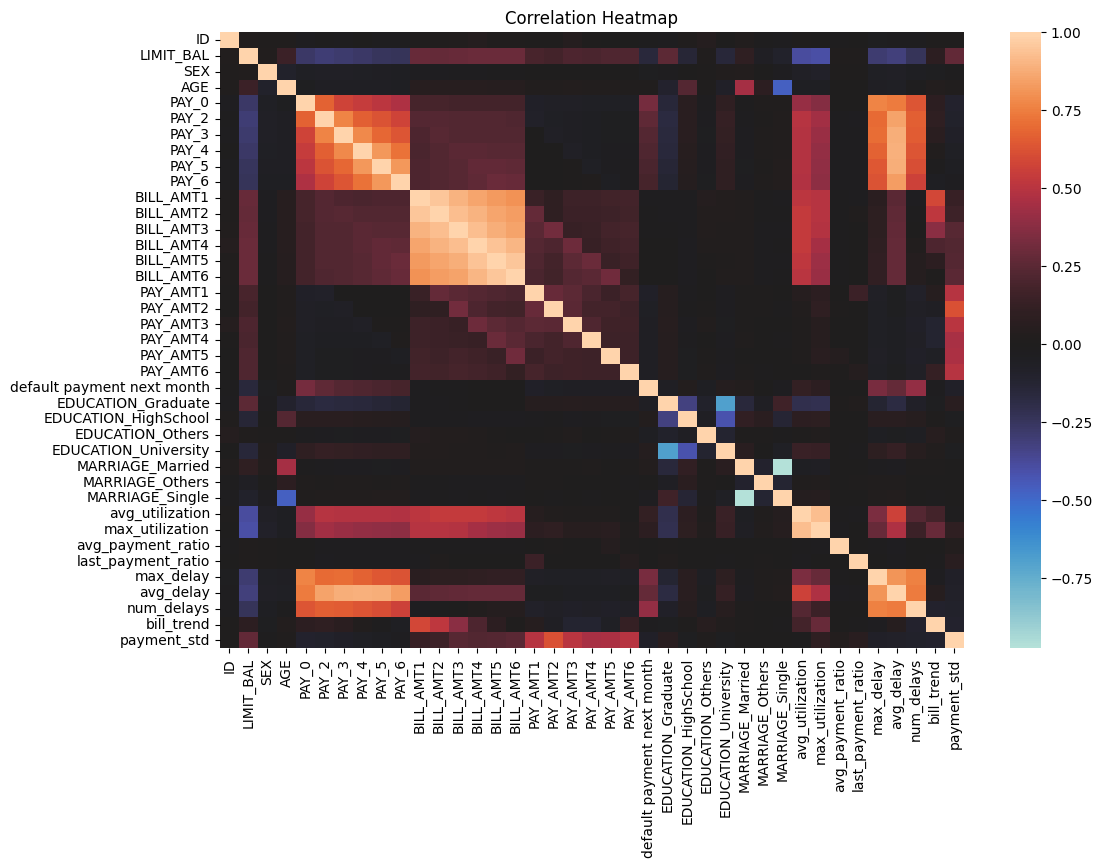

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(df_cleaned.corr(), center=0)
plt.title("Correlation Heatmap")
plt.show()

In [72]:
drop_cols = [
    "ID", 
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", 
    "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", 
    "bill_trend", 
    "last_payment_ratio", 
    "avg_payment_ratio"
]
drop_cols = [col for col in drop_cols if col in df_cleaned.columns]

#all cleaned and engineered features
exp_df = df_cleaned.drop(columns=drop_cols)


In [74]:
exp_df.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month', 'EDUCATION_Graduate',
       'EDUCATION_HighSchool', 'EDUCATION_Others', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single',
       'avg_utilization', 'max_utilization', 'max_delay', 'avg_delay',
       'num_delays', 'payment_std'],
      dtype='object')

In [78]:

# Final 8 production features
prod_features = [
    "AGE",
    "SEX",
    'EDUCATION_Graduate','EDUCATION_HighSchool', 'EDUCATION_Others', 'EDUCATION_University',
     'MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single',
    "LIMIT_BAL",
    "PAY_0",
    "avg_utilization",
    "avg_payment_ratio"
]

# Production dataframe (only 8 features + target)
final_df = df_cleaned[prod_features + ["default payment next month"]]

In [79]:
print("✅ Experiment DF shape:", exp_df.shape)
print("✅ Production DF shape:", final_df.shape)

✅ Experiment DF shape: (30000, 29)
✅ Production DF shape: (30000, 14)


# Thank You for Watching